# **Statistics for Angle to ablation Analysis**
(Stats_Angles2Ablation) by Stephane Verger

## **What does this notebook contain**
This notebook proposes various statistical analysis of the data (descriptive and inferential), obtained from the quantification output of the Angle2Ablation.ijm macro, part of the MT_Angle2Ablation_Workflow (https://github.com/VergerLab/MT_Angle2Ablation_Workflow).

* **1- Single condition/timepoint:** Display data, mean angle and anisotropy, histogram representation, and data distrubution skewness and mode.
* **2- Multiple condition and time points comparisons:** Same as (1- Single condition/timepoint) but does it for multiple subfolders (corresponding to different condition/timepoints) in a folder. Then displays boxplots of the of angles and anisotropies comparing different samples and generate statistical tests to test the significance of difference between samples.
* **3- Timelapses...Todo**


## **How to use this notebook**
The principle is that you can run pieces of code that perform the diferent steps of the statistical analysis, one by one. In this case you will first load the required python packages, and display their version number. You will then load your data (actually define the path), display the content of your data, start to run some descriptive statistic of your data, etc. 
Follow the instructions in the notebook step by step, keeping in mind that sometimes some cells can be skipped. 

Running a cell containing a peice of code is simply done by clicking on the grayed area (selected cell will appear outlined in blue) and pressing Shift+Enter. This will execute the content of the cell.

To discover the basics of how to run a jupyter notebook, you can also try: https://try.jupyter.org. Click on "Try Classic Notebook".

### **Load required packages**
Before starting, load packages and functions (click on the cell below and hit enter+shift to run it).
Then run each cell one by one depending on the analysis you want to perform.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

To confirm that the packages were loaded properly and for record keeping of the actual conditions of the analysis, you can show the version number of the packages, the python version and the system used. To do so, run the cell below.

In [2]:
%load_ext watermark
%watermark -v -m -p pip,jupyterlab,pandas,numpy,matplotlib,seaborn,scipy,watermark

CPython 3.7.9
IPython 7.19.0

pip 20.2.4
jupyterlab 2.1.5
pandas 1.0.5
numpy 1.19.2
matplotlib 3.2.2
seaborn 0.10.1
scipy 1.5.0
watermark 2.0.2

compiler   : GCC 7.3.0
system     : Linux
release    : 4.15.0-1100-oem
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


## **1. Single condition/timepoint**
This part of the notebook is dedicated to examine each data groups descriptive statistics independently. It can be useful before comparative analysis, but not mandatory. Similar data is automatically generated for each compared conditions in "2- Multiple condition and time points comparisons". This part of the notebook can also be useful if you want to modify part of the analysis pipeline to test different functions and paramaters by modifying the code (e.g. for the histogram layout).

!!!Run at least once the cells in "1.4. Make histograms of angles" and "1.5. Make box plots of angles and anisotropies" to load the functions they contain before running the multiple comparison. That also mean that to do that you first need at least run step "1.1. Load Data".

### **1.1. Load data**
In the cell below, define the full path to the file containing all the data to analyse (All_..._Angle2Ablation.txt). (If you are trying the analysis with the pre-loaded test data on binder, directly run the cell below).

1. First, in the cell below, erase the current path "/Home/..."
2. Keep the two quotes '.
   - On LINUX, MAC or if you run the notebook on binder, also keep the first slash (/). In the cell, you should have (single_file_path = '/').
   - On windows you should instead have something like (single_file_path = 'C:\\').
3. Place your mouse cursor and click just before the second quote mark (single_file_path = '/[here]' or single_file_path = 'C:\\[here]').
4. Then press tab. A list of the subdirectories will drop down. Select the one containing the folder with your data. Continue until you finally select the actual file that you want to analyse (All_..._Angle2Ablation.txt). If you are using binder, start the path with "/home/jovyan/".
5. Once your path is complete (The cell content should look like "single_file_path ='/home/jovyan/TestData/Test_file/All_Test_file_Angle2Ablation.txt'"), run the cell.

!!! Avoid spaces in the names of the folders!!!

In [3]:
single_file_path ='/home/jovyan/TestData/Test_file/All_Test_file_Angle2Ablation.txt'

Then run the following cell to extracts the folder name and path for figure labelling.

In [4]:
single_folder_path = os.path.dirname(single_file_path)
single_folder_name = os.path.basename(single_folder_path) 
print (single_folder_path)
print (single_folder_name)

/home/stephane/Research/Experiments/Ablation_Angle_Analysis/From_github/MT_Angle2Ablation_Workflow-master/TestData/Test_file
Test_file


### **1.2. Display the data in a table**
Show content of the file loaded above

In [5]:
single_data = pd.read_csv(single_file_path, sep = "\t")
single_data

,Genotype/condition,Sample Number,CellNumber,FibrilTool Angle,Drawn Line Angle,Raw angle,Absolute angle,Acute absolute angle to ablation,Anisotropy
0,Test_file,1,1,41.9872,162.8973,-120.9101,120.9101,59.0899,0.1419
1,Test_file,1,2,36.0274,20.6955,15.3319,15.3319,15.3319,0.1493
2,Test_file,1,3,33.6901,92.8624,-59.1723,59.1723,59.1723,0.0945
3,Test_file,1,4,22.3801,86.6335,-64.2534,64.2534,64.2534,0.1572
4,Test_file,1,5,42.8789,161.8962,-119.0173,119.0173,60.9827,0.1533
5,Test_file,1,6,33.6901,14.0362,19.6538,19.6538,19.6538,0.0702
6,Test_file,2,1,28.6105,15.1011,13.5094,13.5094,13.5094,0.2459
7,Test_file,2,2,22.6199,162.7585,-140.1387,140.1387,39.8613,0.1345
8,Test_file,2,3,37.2348,80.9097,-43.6749,43.6749,43.6749,0.2523
9,Test_file,2,4,27.8973,90.0000,-62.1027,62.1027,62.1027,0.1834


### **1.3. Descriptive statistics**
Calculate the number of samples (count), mean value, standard deviation, lowest and highest values (min/max), and percentiles (50% = median) of the angle and anisotropy values.

The first cell will calculate the descriptive statistics for the angles values, while the second cell will do it for the anisotropy values.

In [6]:
Angle_desc_stats = single_data['Acute absolute angle to ablation'].describe()
Angle_desc_stats

count    12.000000
mean     41.903542
std      19.807807
min      13.509400
25%      20.764100
50%      43.875450
75%      59.624900
max      64.253400
Name: Acute absolute angle to ablation, dtype: float64

In [7]:
Anisotropy_desc_stats = single_data['Anisotropy'].describe()
Anisotropy_desc_stats

count    12.000000
mean      0.168858
std       0.057908
min       0.070200
25%       0.140050
50%       0.155250
75%       0.216650
max       0.252300
Name: Anisotropy, dtype: float64

### **1.4. Make histograms of angles**
This cell generates one histogram diplaying simply the distribution of the angles.

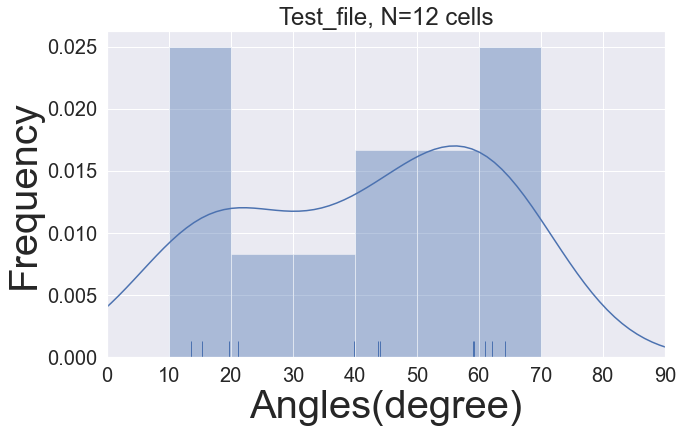

In [8]:
def makeAnglesHistogram(HistAngles, title):
    sns.set(rc={'figure.figsize':(10,6)}) # To change the size of the figure
    bins = np.linspace(0, 90, 10) # To change the number of histogram bin (bars).
    sns.distplot(HistAngles, bins=bins, rug=True)

    plt.xlabel('Angles(degree)', fontsize=40) # To change the axis labels and font size
    plt.ylabel('Frequency', fontsize=40) # To change the axis labels and font size
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlim(0,90)
    plt.title(title + ', N=' + str(len(HistAngles)) + ' cells', fontsize=24) # To change the figure title
    plt.grid(True)

SingleAngleHist = makeAnglesHistogram(single_data['Acute absolute angle to ablation'], single_folder_name)

### **1.5. Make box plots of angles and anisotropies**
Generates boxplot overlayed with stripplot diplaying the distribution of the angles as well as anisotropes, for each sample in the condition. Can allow to check if most samples within a single condition behave in the same way.

The function defined here to make the box plot is the same one used in the multiple comparison later so the boxplot layout and  style can be changed here.

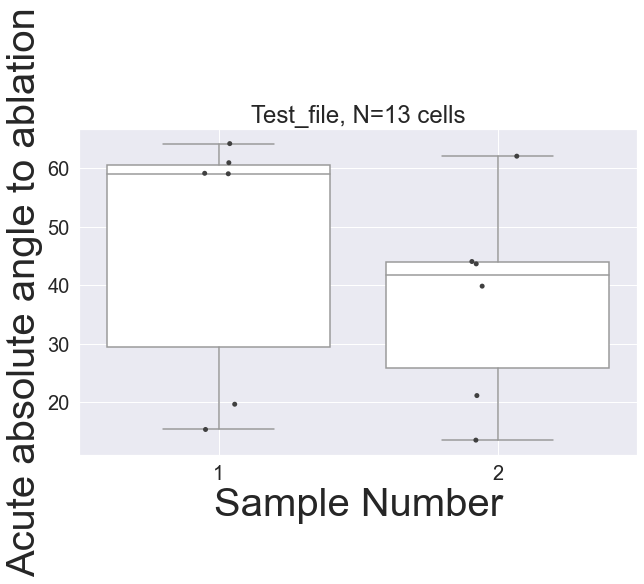

In [9]:
def makeStripBoxplot(StripBoxDataFile, sample, value, title):
    ax = sns.boxplot(x=sample, y=value, data=StripBoxDataFile, color='w')
    ax = sns.stripplot(x=sample, y=value, data=StripBoxDataFile, color='0.25')
    plt.xlabel(sample, fontsize=40) # To change the axis labels and font size
    plt.ylabel(value, fontsize=40) # To change the axis labels and font size
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(title + ', N=' + str(len(sample)) + ' cells', fontsize=24) # To change the figure title
    plt.grid(True)
    
SingleAngleBoxplot = makeStripBoxplot(single_data, 'Sample Number', 'Acute absolute angle to ablation', single_folder_name)

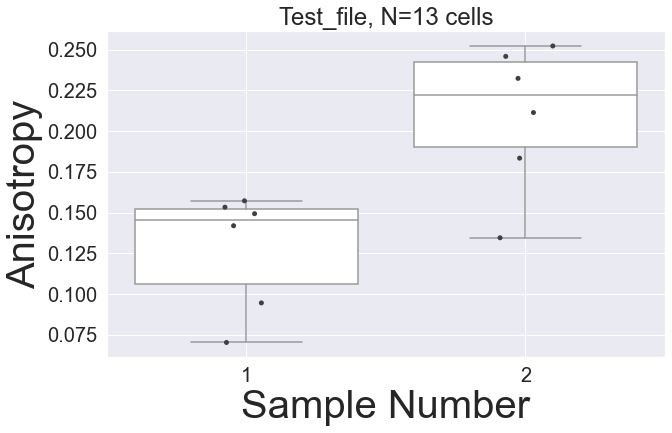

In [10]:
SingleAnisotropyBoxplot = makeStripBoxplot(single_data, 'Sample Number', 'Anisotropy', single_folder_name)

### **1.6. Skweness**
"Skew: For normally distributed data, the skewness should be about zero. For unimodal continuous distributions, a skewness value greater than zero means that there is more weight in the right tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to zero, statistically speaking. If the p-value is lower than 0.05, it can be considered that the distribution is significantly skewed." From https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html

In [11]:
skew=stats.skew(single_data['Acute absolute angle to ablation'])
statskew, pskew=stats.skewtest(single_data['Acute absolute angle to ablation'])
print ("skew " + str(skew) + "\npvalue " + str(pskew))

skew -0.3059710620476703
pvalue 0.5649860275941583


### **1.7. Save output**

Todo...
Not necessary if you intend to perform multiple comparison with the condition examined here.

Define where to save the output.

In [ ]:
single_output_path = '/home/stephane/Desktop/Segmentation4FTBatch-master/response/'

In [ ]:
...To do figure.savefig(single_folder + "_histogram.svg")

## **2. Multiple condition and time points comparisons:** 
This part of the notebook is dedicated to compare the quantifications obtained in the different conditions tested. It first runs the same descritpive staistics as in part 1 of the notebook, but does it automatically for multiple subfolders (corresponding to different condition/mutant/timepoints) in a Directory. In addition, it displays boxplots of the angles and anisotropies comparing different samples and generates inferential statistical tests to determine if there are significant difference between the compared samples.


### **2.1. Load data**
First define the path to the directory that contains all the conditions you want to compare. Below, in multiple_updir_path, as an example the pre-loaded to run the test data on binder is already defined. The "TestData" directory contains all the subfolder that will be analyzed. To run the analysis on your own data, change the path accordingly. Use tab to help navigation in the folders. Then don't forget to run the cell.

In [19]:
multiple_updir_path = '/home/jovyan/TestData/Test_file/'

### **2.2. Generate and save descriptive statistics**
This large piece of code runs most of the actions performed in the first part of the notebook, but it does it automatically for all the files and subfolders in the directory defined above.


>>>Condition analyzed: Test_file

Acute absolute angle to ablation descriptive statistics:
count    12.000000
mean     41.903542
std      19.807807
min      13.509400
25%      20.764100
50%      43.875450
75%      59.624900
max      64.253400
Name: Acute absolute angle to ablation, dtype: float64

Anisotropy descriptive statistics:
count    12.000000
mean      0.168858
std       0.057908
min       0.070200
25%       0.140050
50%       0.155250
75%       0.216650
max       0.252300
Name: Anisotropy, dtype: float64

Angles distribution skeweness statistics:
skew -0.3059710620476703
pvalue 0.5649860275941583


>>>Condition analyzed: response

Acute absolute angle to ablation descriptive statistics:
count    12.000000
mean      9.510075
std       5.519996
min       0.239700
25%       7.147775
50%       9.366750
75%      12.358475
max      21.186600
Name: Acute absolute angle to ablation, dtype: float64

Anisotropy descriptive statistics:
count    12.000000
mean      0.168858
std       0.0

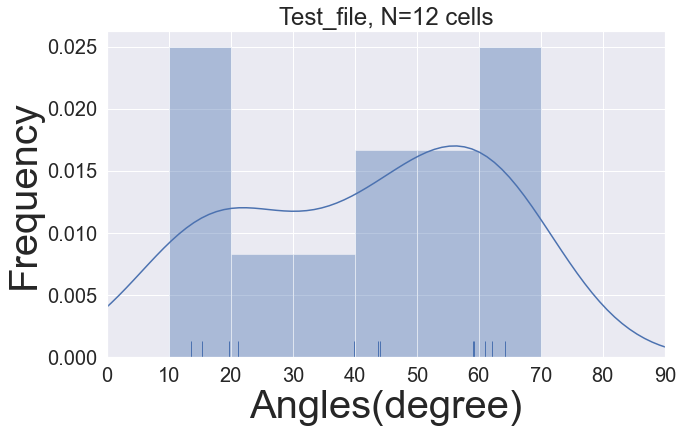

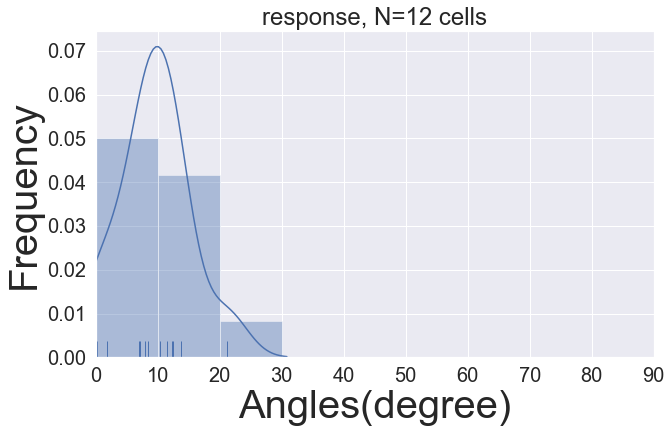

In [13]:
multi_data = pd.DataFrame(columns = ['Genotype/condition', 'Sample Number', 'CellNumber', 'FibrilTool Angle', 'Drawn Line Angle', 'Raw angle', 'Absolute angle', 'Acute absolute angle to ablation', 'Anisotropy'])
###Find subdirectories containing the experiments/conditions to analyse
for dirname in sorted(os.listdir(multiple_updir_path)):
    dirpath = multiple_updir_path + dirname
    if os.path.isdir(dirpath):
        if ".ipynb_checkpoints" in dirname:
            print (".ipynb_checkpoints folder skipped\n\n")
        else:
            print ("\n>>>Condition analyzed: " + dirname)
            
            ###Load data
            Result_file_name = 'All_' + dirname + '_Angle2Ablation.txt'
            data = pd.read_csv(dirpath + '/' + Result_file_name, sep = "\t")
            
            ###Descriptive statistics
            for datatype in ('Acute absolute angle to ablation', 'Anisotropy'):
                Multi_Angle_desc_stats = data[datatype].describe()
                print ("\n" + datatype + " descriptive statistics:")
                print (Multi_Angle_desc_stats)
                #print (data[datatype])
            
            #Skew
            skew=stats.skew(data['Acute absolute angle to ablation'])
            statskew, pskew=stats.skewtest(data['Acute absolute angle to ablation'])
            print ("\nAngles distribution skeweness statistics:")
            print ("skew " + str(skew) + "\npvalue " + str(pskew) + "\n")
            
            #Histogram Angles
            plt.figure(dirname + "angles")
            makeAnglesHistogram(data['Acute absolute angle to ablation'], dirname)
            #figure.savefig(multiple_updir_path + dirname + "_histogramfh.svg")
            
            ### Add the current subfolder name to the list of analyzed subfolder names
            multi_data = pd.concat([multi_data, data], ignore_index=True)

When running the piece of code above, we also agregate all the angles and anisotropy data form the different conditions into a new single table. Run the cell below to display new dataframe generated.

In [14]:
multi_data

,Genotype/condition,Sample Number,CellNumber,FibrilTool Angle,Drawn Line Angle,Raw angle,Absolute angle,Acute absolute angle to ablation,Anisotropy
0,Test_file,1,1,41.9872,162.8973,-120.9101,120.9101,59.0899,0.1419
1,Test_file,1,2,36.0274,20.6955,15.3319,15.3319,15.3319,0.1493
2,Test_file,1,3,33.6901,92.8624,-59.1723,59.1723,59.1723,0.0945
3,Test_file,1,4,22.3801,86.6335,-64.2534,64.2534,64.2534,0.1572
4,Test_file,1,5,42.8789,161.8962,-119.0173,119.0173,60.9827,0.1533
5,Test_file,1,6,33.6901,14.0362,19.6538,19.6538,19.6538,0.0702
6,Test_file,2,1,28.6105,15.1011,13.5094,13.5094,13.5094,0.2459
7,Test_file,2,2,22.6199,162.7585,-140.1387,140.1387,39.8613,0.1345
8,Test_file,2,3,37.2348,80.9097,-43.6749,43.6749,43.6749,0.2523
9,Test_file,2,4,27.8973,90.0000,-62.1027,62.1027,62.1027,0.1834


Generate boxplot to compare anisotropies and angles

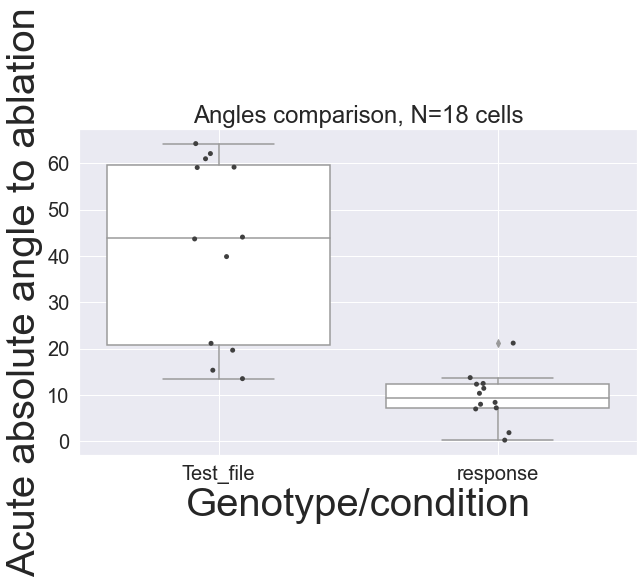

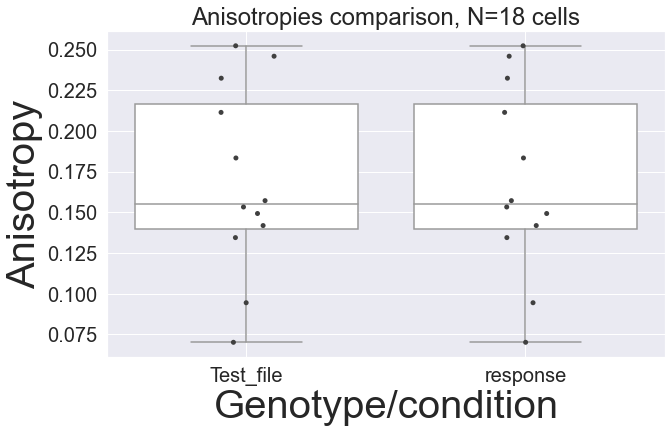

In [16]:
plt.figure("Angles comparison")
MultiAngleBoxplot = makeStripBoxplot(multi_data, 'Genotype/condition', 'Acute absolute angle to ablation', "Angles comparison")
plt.figure("Anisotropies comparison")
MultiAnisotropyBoxplot = makeStripBoxplot(multi_data, 'Genotype/condition', 'Anisotropy', "Anisotropies comparison")

### **Run statistical tests to compare CMT reorientation and anisotropy after response to ablation**

Genotypes and conditions to compare

In [17]:
list_geno_cond = multi_data['Genotype/condition'].unique()
print ("There are " + str(len(list_geno_cond)) + " genotype and/or condition to compare:\n" + str(list_geno_cond))

There are 2 genotype and/or condition to compare:
['Test_file' 'response']


In [18]:
#Loop to compare each samples
for A in list_geno_cond:
    result_A = np.where(list_geno_cond == A)
    for B in list_geno_cond:
        result_B = np.where(list_geno_cond == B)
        if result_A[0]<result_B[0]:            
            print ("\n>>>Comparison of '" + A + "' and '" + B + "'")
            
            ###Process: 'Angles' --> angle_data_ and 'Anisotropy' --> anisotropy_data_ for each comparison
            for col_name in ('Acute absolute angle to ablation', 'Anisotropy'):
                data_inputA = multi_data[multi_data['Genotype/condition'] == A][col_name]
                data_inputB = multi_data[multi_data['Genotype/condition'] == B][col_name]
                #print (str(A) + " -> " + str(col_name) + "\n" + str(data_inputA))
                #print (str(B) + " -> " + str(col_name) + "\n" + str(data_inputB))
                
                ###Test decision 
                ###t-test can be done if both samples populations a normally distributed and have equal variance
                ###
        
                ###Shapiro's test for normality
                ###test sample A and then samples B
                norm = []
                print ("- Shapiro's test for normality:")
                for sample, name in zip((data_inputA, data_inputB), (A, B)):
                    w, pnorm = stats.shapiro(sample)
                    #print (sample)
                    if pnorm>0.05:
                        norm.append(True)
                        print (name + " " + col_name + " population IS normally distributed --> p-value is " + str(round(pnorm, 4)))
                    else:
                        norm.append(False)
                        print (name + " " + col_name + " population is NOT normally distributed--> p-value is " + str(round(pnorm, 4)))
                        
                ### Determine "t-test or Welchs test" or "wilcoxon rank sum test"
                if norm[0] and norm[1] is True:
                    print ("Both sample have normal distibution --> t-test or Welchs test\n")
            
                    ###Bartlett's test for equal variance (to determine between t-test and Welchs test)
                    print ("- Bartlett's test for equal variance")
                    t, pvar = stats.bartlett(data_inputA, data_inputB)
                    if pvar>0.05:
                        equalvar=True
                        print ("samples have equal variance--> t-test")
                    else:
                        equalvar=False
                        print ("samples do not have equal variance--> Welchs test")

                    ###t-test (Welch's if variances are unequal)
                    t2, pVal = stats.ttest_ind(data_inputA, data_inputB, equal_var=equalvar)

                ### If at least one sample has non normal population distribution: wilcoxon rank sum test
                else:
                    print ("At least one sample does Not have normal distibution --> wilcoxon rank sum test")
                    statrank, pVal = stats.ranksums(data_inputA, data_inputB)
        
        
                ### Comparison test output
                if pVal>0.05:
                    print ("###################################################################\n",
                           "--> " + col_name + " are NOT significantly different --> p-value is " + str(round(pVal,10)) +
                           "\n###################################################################\n")

                else:
                    print ("###################################################################\n",
                           "--> " + col_name + " are significantly different --> p-value is " + str(round(pVal,10)) +
                           "\n###################################################################\n")


>>>Comparison of 'Test_file' and 'response'
- Shapiro's test for normality:
Test_file Acute absolute angle to ablation population is NOT normally distributed--> p-value is 0.0464
response Acute absolute angle to ablation population IS normally distributed --> p-value is 0.723
At least one sample does Not have normal distibution --> wilcoxon rank sum test
###################################################################
 --> Acute absolute angle to ablation are significantly different --> p-value is 0.0001096207
###################################################################

- Shapiro's test for normality:
Test_file Anisotropy population IS normally distributed --> p-value is 0.6541
response Anisotropy population IS normally distributed --> p-value is 0.6541
Both sample have normal distibution --> t-test or Welchs test

- Bartlett's test for equal variance
samples have equal variance--> t-test
###################################################################
 --> Anisotropy ar